<a href="https://colab.research.google.com/github/siyeol/Natural-Language-Processing/blob/main/TheGuardian_Soccer_TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.theguardian.com/football?page=1900 까지 존재
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/SW_Coaching_for_Python"
my_folder = "SYC"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = "{}/{}/outcome".format(path, my_folder)

Mounted at /content/gdrive


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
urls = ["https://www.theguardian.com/football?page=1"]

for i in range(2, 300):     # The range(2, 10) generates a list of integers from 2 to 9. ### 이거를 키우면 값 커짐!!
    url = "https://www.theguardian.com/football?page={}".format(i)
    urls.append(url)

urls

In [ ]:
urls = ["https://www.theguardian.com/football?page=300"]

for i in range(301, 400):     # The range(2, 10) generates a list of integers from 2 to 9. ### 이거를 키우면 값 커짐!!
    url = "https://www.theguardian.com/football?page={}".format(i)
    urls.append(url)

urls

In [ ]:
# i=1
import time

articles = []
for url in urls:
  r=requests.get(url)
  soup = BeautifulSoup(r.content, "html.parser")
  temp = soup.find_all('div', {'class':'fc-item__content'})
  for t in temp:
    articles.append(t.find("a")["href"])
  # with open("{}/PJ_HTMLs/{}".format(outcome_folder, "PJ_Guardian_{}.html".format(i)), "w+b") as fw:
  #   fw.write(r.content)
  # i=i+1
  # time.sleep(5)

In [ ]:
import time
i=5981
with open("{}/PJ_metadata_5980.csv".format(outcome_folder), "a") as fw:
  # article_contents = []
  #fw.write("title\tauthor\tdate\tinside\n")
  for article in articles:
    inside = ""
    r2=requests.get(article)
    with open("{}/PJ_html/{}".format(outcome_folder, "PJ_html_{}.html".format(i)), "w+b") as fb:
      fb.write(r2.content)
    soup2 = BeautifulSoup(r2.content, "html.parser")
    
    if soup2.find("h1", {"class":"css-7g0r1e"}) != None:
      title = soup2.find("h1", {"class":"css-7g0r1e"}).text.strip().replace("\t", "").replace("\n", "")
    else : title = "UNKNOWN"

    if soup2.find("a", {"rel":"author"}) != None:
      author = soup2.find("a", {"rel":"author"}).text.strip().replace("\t", "").replace("\n", "")
    else: author = "UNKNOWN"

    if soup2.find("label", {"class":"css-hn0k3p"})!=None:
      date = soup2.find("label", {"class":"css-hn0k3p"}).text.strip().replace("\t", "").replace("\n", "")
    else : date = "UNKNOWN"

    if soup2.find_all("p", {"class":"css-19dnnol"})!=None:
      main = soup2.find_all("p", {"class":"css-19dnnol"})
      for t in main:
        inside=inside + t.text.replace("\t", "").replace("\n", "")
    else:inside = "UNKNOWN"
    #article_contents.append(inside)

    fw.write("{}\t{}\t{}\t{}\n".format(title, author, date, inside))
    # time.sleep(2)
    i=i+1

여기서부턴 CSV분석
***굵은 텍스트***




In [ ]:
import pandas as pd

df = pd.read_csv(f"{outcome_folder}/PJ_metadata_5980.csv", sep="\t")
df

,title,author,date,inside
0,German Greens vote to expel city mayor over on...,Philip Oltermann,Mon 10 May 2021 08.41 EDT,NaN
1,Solskjær says youngsters in contention as Manc...,Aaron Bower,Mon 10 May 2021 08.30 EDT,Ole Gunnar Solskjær insists he will not risk t...
2,UNKNOWN,Andy Brassell,Mon 10 May 2021 08.15 EDT,Bayern Munich have found a variety of differen...
3,UNKNOWN,UNKNOWN,Mon 10 May 2021 08.01 EDT,PSG have won the title in seven of the last ei...
4,UNKNOWN,Nicky Bandini,Mon 10 May 2021 07.32 EDT,If a single image could capture how far Juvent...
...,...,...,...,...
7975,Kyle Walker hits back at 'harassment' after br...,Jamie Jackson,Fri 8 May 2020 06.15 EDT,Kyle Walker believes he is being harassed by t...
7976,"Neutral venue plan has 'no rationale', says fo...",David Conn,Fri 8 May 2020 05.04 EDT,Police advice that Premier League clubs must p...
7977,UNKNOWN,Richard Jolly,Fri 8 May 2020 03.00 EDT,The anniversary falls on Friday. In the second...
7978,Korea in world football spotlight as K-League ...,Guardian sport,Thu 7 May 2020 22.24 EDT,The eyes of the football world will be on the ...


In [ ]:
df=df.dropna() #remove NaN
df=df.reset_index(drop=True)
df

,title,author,date,inside
0,Solskjær says youngsters in contention as Manc...,Aaron Bower,Mon 10 May 2021 08.30 EDT,Ole Gunnar Solskjær insists he will not risk t...
1,UNKNOWN,Andy Brassell,Mon 10 May 2021 08.15 EDT,Bayern Munich have found a variety of differen...
2,UNKNOWN,UNKNOWN,Mon 10 May 2021 08.01 EDT,PSG have won the title in seven of the last ei...
3,UNKNOWN,Nicky Bandini,Mon 10 May 2021 07.32 EDT,If a single image could capture how far Juvent...
4,UNKNOWN,Suzanne Wrack,Mon 10 May 2021 06.59 EDT,Ann-Katrin Berger 9 Her performances should se...
...,...,...,...,...
6173,Kyle Walker hits back at 'harassment' after br...,Jamie Jackson,Fri 8 May 2020 06.15 EDT,Kyle Walker believes he is being harassed by t...
6174,"Neutral venue plan has 'no rationale', says fo...",David Conn,Fri 8 May 2020 05.04 EDT,Police advice that Premier League clubs must p...
6175,UNKNOWN,Richard Jolly,Fri 8 May 2020 03.00 EDT,The anniversary falls on Friday. In the second...
6176,Korea in world football spotlight as K-League ...,Guardian sport,Thu 7 May 2020 22.24 EDT,The eyes of the football world will be on the ...


In [ ]:
df.inside = df.inside.astype(str)
df

,title,author,date,inside
0,Solskjær says youngsters in contention as Manc...,Aaron Bower,Mon 10 May 2021 08.30 EDT,Ole Gunnar Solskjær insists he will not risk t...
1,UNKNOWN,Andy Brassell,Mon 10 May 2021 08.15 EDT,Bayern Munich have found a variety of differen...
2,UNKNOWN,UNKNOWN,Mon 10 May 2021 08.01 EDT,PSG have won the title in seven of the last ei...
3,UNKNOWN,Nicky Bandini,Mon 10 May 2021 07.32 EDT,If a single image could capture how far Juvent...
4,UNKNOWN,Suzanne Wrack,Mon 10 May 2021 06.59 EDT,Ann-Katrin Berger 9 Her performances should se...
...,...,...,...,...
6173,Kyle Walker hits back at 'harassment' after br...,Jamie Jackson,Fri 8 May 2020 06.15 EDT,Kyle Walker believes he is being harassed by t...
6174,"Neutral venue plan has 'no rationale', says fo...",David Conn,Fri 8 May 2020 05.04 EDT,Police advice that Premier League clubs must p...
6175,UNKNOWN,Richard Jolly,Fri 8 May 2020 03.00 EDT,The anniversary falls on Friday. In the second...
6176,Korea in world football spotlight as K-League ...,Guardian sport,Thu 7 May 2020 22.24 EDT,The eyes of the football world will be on the ...


In [ ]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

from nltk.util import ngrams
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["sentences"] = df.inside.apply(lambda x: nltk.sent_tokenize(x))
df["num_sentences"] = df.sentences.apply(lambda x: len(x))
df[["inside", "sentences", "num_sentences"]]

,inside,sentences,num_sentences
0,Ole Gunnar Solskjær insists he will not risk t...,[Ole Gunnar Solskjær insists he will not risk ...,14
1,Bayern Munich have found a variety of differen...,[Bayern Munich have found a variety of differe...,28
2,PSG have won the title in seven of the last ei...,[PSG have won the title in seven of the last e...,49
3,If a single image could capture how far Juvent...,[If a single image could capture how far Juven...,42
4,Ann-Katrin Berger 9 Her performances should se...,[Ann-Katrin Berger 9 Her performances should s...,23
...,...,...,...
6173,Kyle Walker believes he is being harassed by t...,[Kyle Walker believes he is being harassed by ...,12
6174,Police advice that Premier League clubs must p...,[Police advice that Premier League clubs must ...,11
6175,The anniversary falls on Friday. In the second...,"[The anniversary falls on Friday., In the seco...",49
6176,The eyes of the football world will be on the ...,[The eyes of the football world will be on the...,8


In [ ]:
df["words"] = df.inside.apply(lambda x: nltk.word_tokenize(x))
df["num_words"] = df.words.apply(lambda x: len(x))
df[["inside", "words", "num_words"]]

,inside,words,num_words
0,Ole Gunnar Solskjær insists he will not risk t...,"[Ole, Gunnar, Solskjær, insists, he, will, not...",507
1,Bayern Munich have found a variety of differen...,"[Bayern, Munich, have, found, a, variety, of, ...",1328
2,PSG have won the title in seven of the last ei...,"[PSG, have, won, the, title, in, seven, of, th...",1404
3,If a single image could capture how far Juvent...,"[If, a, single, image, could, capture, how, fa...",1261
4,Ann-Katrin Berger 9 Her performances should se...,"[Ann-Katrin, Berger, 9, Her, performances, sho...",923
...,...,...,...
6173,Kyle Walker believes he is being harassed by t...,"[Kyle, Walker, believes, he, is, being, harass...",388
6174,Police advice that Premier League clubs must p...,"[Police, advice, that, Premier, League, clubs,...",797
6175,The anniversary falls on Friday. In the second...,"[The, anniversary, falls, on, Friday, ., In, t...",1131
6176,The eyes of the football world will be on the ...,"[The, eyes, of, the, football, world, will, be...",485


In [ ]:
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))
df["nouns"] = df.tagged_words.apply(lambda x: [word for word, tag in x if tag.startswith("NN")])
df[["tagged_words", "nouns"]]

,tagged_words,nouns
0,"[(Ole, NNP), (Gunnar, NNP), (Solskjær, NNP), (...","[Ole, Gunnar, Solskjær, welfare, Manchester, U..."
1,"[(Bayern, NNP), (Munich, NNP), (have, VBP), (f...","[Bayern, Munich, variety, ways, Bundesliga, ch..."
2,"[(PSG, NNS), (have, VBP), (won, VBN), (the, DT...","[PSG, title, seasons, Ligue, Juventus, Serie, ..."
3,"[(If, IN), (a, DT), (single, JJ), (image, NN),...","[image, Juventus, ’, s, sights, campaign, Paul..."
4,"[(Ann-Katrin, NNP), (Berger, NNP), (9, CD), (H...","[Ann-Katrin, Berger, Her, performances, world,..."
...,...,...
6173,"[(Kyle, NNP), (Walker, NNP), (believes, VBZ), ...","[Kyle, Walker, media, rules, parents, sister, ..."
6174,"[(Police, NNP), (advice, NN), (that, WDT), (Pr...","[Police, advice, Premier, League, clubs, venue..."
6175,"[(The, DT), (anniversary, JJ), (falls, NNS), (...","[falls, Friday, comeback, days, Tottenham, ove..."
6176,"[(The, DT), (eyes, NNS), (of, IN), (the, DT), ...","[eyes, football, world, Jeonju, World, Cup, St..."


In [ ]:
df["bigrams"] = df.words.apply(lambda x: [" ".join(gram) for gram in ngrams(x, 2)])
df[["words", "bigrams"]]

,words,bigrams
0,"[Ole, Gunnar, Solskjær, insists, he, will, not...","[Ole Gunnar, Gunnar Solskjær, Solskjær insists..."
1,"[Bayern, Munich, have, found, a, variety, of, ...","[Bayern Munich, Munich have, have found, found..."
2,"[PSG, have, won, the, title, in, seven, of, th...","[PSG have, have won, won the, the title, title..."
3,"[If, a, single, image, could, capture, how, fa...","[If a, a single, single image, image could, co..."
4,"[Ann-Katrin, Berger, 9, Her, performances, sho...","[Ann-Katrin Berger, Berger 9, 9 Her, Her perfo..."
...,...,...
6173,"[Kyle, Walker, believes, he, is, being, harass...","[Kyle Walker, Walker believes, believes he, he..."
6174,"[Police, advice, that, Premier, League, clubs,...","[Police advice, advice that, that Premier, Pre..."
6175,"[The, anniversary, falls, on, Friday, ., In, t...","[The anniversary, anniversary falls, falls on,..."
6176,"[The, eyes, of, the, football, world, will, be...","[The eyes, eyes of, of the, the football, foot..."


In [ ]:
df["polarity"] = df.inside.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df.inside.apply(lambda x: TextBlob(x).sentiment.subjectivity)
df[["inside", "polarity", "subjectivity"]]

,inside,polarity,subjectivity
0,Ole Gunnar Solskjær insists he will not risk t...,0.160761,0.423238
1,Bayern Munich have found a variety of differen...,0.156670,0.476853
2,PSG have won the title in seven of the last ei...,0.124199,0.430339
3,If a single image could capture how far Juvent...,0.132838,0.464103
4,Ann-Katrin Berger 9 Her performances should se...,0.232638,0.406178
...,...,...,...
6173,Kyle Walker believes he is being harassed by t...,0.016005,0.368651
6174,Police advice that Premier League clubs must p...,0.033339,0.369811
6175,The anniversary falls on Friday. In the second...,0.183322,0.425590
6176,The eyes of the football world will be on the ...,0.033472,0.382135


In [ ]:
df

,title,author,date,inside,sentences,num_sentences,words,num_words,tagged_words,nouns,bigrams,polarity,subjectivity
0,Solskjær says youngsters in contention as Manc...,Aaron Bower,Mon 10 May 2021 08.30 EDT,Ole Gunnar Solskjær insists he will not risk t...,[Ole Gunnar Solskjær insists he will not risk ...,14,"[Ole, Gunnar, Solskjær, insists, he, will, not...",507,"[(Ole, NNP), (Gunnar, NNP), (Solskjær, NNP), (...","[Ole, Gunnar, Solskjær, welfare, Manchester, U...","[Ole Gunnar, Gunnar Solskjær, Solskjær insists...",0.160761,0.423238
1,UNKNOWN,Andy Brassell,Mon 10 May 2021 08.15 EDT,Bayern Munich have found a variety of differen...,[Bayern Munich have found a variety of differe...,28,"[Bayern, Munich, have, found, a, variety, of, ...",1328,"[(Bayern, NNP), (Munich, NNP), (have, VBP), (f...","[Bayern, Munich, variety, ways, Bundesliga, ch...","[Bayern Munich, Munich have, have found, found...",0.156670,0.476853
2,UNKNOWN,UNKNOWN,Mon 10 May 2021 08.01 EDT,PSG have won the title in seven of the last ei...,[PSG have won the title in seven of the last e...,49,"[PSG, have, won, the, title, in, seven, of, th...",1404,"[(PSG, NNS), (have, VBP), (won, VBN), (the, DT...","[PSG, title, seasons, Ligue, Juventus, Serie, ...","[PSG have, have won, won the, the title, title...",0.124199,0.430339
3,UNKNOWN,Nicky Bandini,Mon 10 May 2021 07.32 EDT,If a single image could capture how far Juvent...,[If a single image could capture how far Juven...,42,"[If, a, single, image, could, capture, how, fa...",1261,"[(If, IN), (a, DT), (single, JJ), (image, NN),...","[image, Juventus, ’, s, sights, campaign, Paul...","[If a, a single, single image, image could, co...",0.132838,0.464103
4,UNKNOWN,Suzanne Wrack,Mon 10 May 2021 06.59 EDT,Ann-Katrin Berger 9 Her performances should se...,[Ann-Katrin Berger 9 Her performances should s...,23,"[Ann-Katrin, Berger, 9, Her, performances, sho...",923,"[(Ann-Katrin, NNP), (Berger, NNP), (9, CD), (H...","[Ann-Katrin, Berger, Her, performances, world,...","[Ann-Katrin Berger, Berger 9, 9 Her, Her perfo...",0.232638,0.406178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,Kyle Walker hits back at 'harassment' after br...,Jamie Jackson,Fri 8 May 2020 06.15 EDT,Kyle Walker believes he is being harassed by t...,[Kyle Walker believes he is being harassed by ...,12,"[Kyle, Walker, believes, he, is, being, harass...",388,"[(Kyle, NNP), (Walker, NNP), (believes, VBZ), ...","[Kyle, Walker, media, rules, parents, sister, ...","[Kyle Walker, Walker believes, believes he, he...",0.016005,0.368651
6174,"Neutral venue plan has 'no rationale', says fo...",David Conn,Fri 8 May 2020 05.04 EDT,Police advice that Premier League clubs must p...,[Police advice that Premier League clubs must ...,11,"[Police, advice, that, Premier, League, clubs,...",797,"[(Police, NNP), (advice, NN), (that, WDT), (Pr...","[Police, advice, Premier, League, clubs, venue...","[Police advice, advice that, that Premier, Pre...",0.033339,0.369811
6175,UNKNOWN,Richard Jolly,Fri 8 May 2020 03.00 EDT,The anniversary falls on Friday. In the second...,"[The anniversary falls on Friday., In the seco...",49,"[The, anniversary, falls, on, Friday, ., In, t...",1131,"[(The, DT), (anniversary, JJ), (falls, NNS), (...","[falls, Friday, comeback, days, Tottenham, ove...","[The anniversary, anniversary falls, falls on,...",0.183322,0.425590
6176,Korea in world football spotlight as K-League ...,Guardian sport,Thu 7 May 2020 22.24 EDT,The eyes of the football world will be on the ...,[The eyes of the football world will be on the...,8,"[The, eyes, of, the, football, world, will, be...",485,"[(The, DT), (eyes, NNS), (of, IN), (the, DT), ...","[eyes, football, world, Jeonju, World, Cup, St...","[The eyes, eyes of, of the, the football, foot...",0.033472,0.382135


In [ ]:
df.to_csv("{}/PJ_metadata_final_test.csv".format(outcome_folder))

In [ ]:
temp = pd.read_csv("{}/PJ_metadata_final_test.csv".format(outcome_folder))


In [ ]:
del temp['Unnamed: 0']
temp

,title,author,date,inside,sentences,num_sentences,words,num_words,tagged_words,nouns,bigrams,polarity,subjectivity
0,Solskjær says youngsters in contention as Manc...,Aaron Bower,Mon 10 May 2021 08.30 EDT,Ole Gunnar Solskjær insists he will not risk t...,['Ole Gunnar Solskjær insists he will not risk...,14,"['Ole', 'Gunnar', 'Solskjær', 'insists', 'he',...",507,"[('Ole', 'NNP'), ('Gunnar', 'NNP'), ('Solskjær...","['Ole', 'Gunnar', 'Solskjær', 'welfare', 'Manc...","['Ole Gunnar', 'Gunnar Solskjær', 'Solskjær in...",0.160761,0.423238
1,UNKNOWN,Andy Brassell,Mon 10 May 2021 08.15 EDT,Bayern Munich have found a variety of differen...,['Bayern Munich have found a variety of differ...,28,"['Bayern', 'Munich', 'have', 'found', 'a', 'va...",1328,"[('Bayern', 'NNP'), ('Munich', 'NNP'), ('have'...","['Bayern', 'Munich', 'variety', 'ways', 'Bunde...","['Bayern Munich', 'Munich have', 'have found',...",0.156670,0.476853
2,UNKNOWN,UNKNOWN,Mon 10 May 2021 08.01 EDT,PSG have won the title in seven of the last ei...,['PSG have won the title in seven of the last ...,49,"['PSG', 'have', 'won', 'the', 'title', 'in', '...",1404,"[('PSG', 'NNS'), ('have', 'VBP'), ('won', 'VBN...","['PSG', 'title', 'seasons', 'Ligue', 'Juventus...","['PSG have', 'have won', 'won the', 'the title...",0.124199,0.430339
3,UNKNOWN,Nicky Bandini,Mon 10 May 2021 07.32 EDT,If a single image could capture how far Juvent...,['If a single image could capture how far Juve...,42,"['If', 'a', 'single', 'image', 'could', 'captu...",1261,"[('If', 'IN'), ('a', 'DT'), ('single', 'JJ'), ...","['image', 'Juventus', '’', 's', 'sights', 'cam...","['If a', 'a single', 'single image', 'image co...",0.132838,0.464103
4,UNKNOWN,Suzanne Wrack,Mon 10 May 2021 06.59 EDT,Ann-Katrin Berger 9 Her performances should se...,['Ann-Katrin Berger 9 Her performances should ...,23,"['Ann-Katrin', 'Berger', '9', 'Her', 'performa...",923,"[('Ann-Katrin', 'NNP'), ('Berger', 'NNP'), ('9...","['Ann-Katrin', 'Berger', 'Her', 'performances'...","['Ann-Katrin Berger', 'Berger 9', '9 Her', 'He...",0.232638,0.406178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,Kyle Walker hits back at 'harassment' after br...,Jamie Jackson,Fri 8 May 2020 06.15 EDT,Kyle Walker believes he is being harassed by t...,['Kyle Walker believes he is being harassed by...,12,"['Kyle', 'Walker', 'believes', 'he', 'is', 'be...",388,"[('Kyle', 'NNP'), ('Walker', 'NNP'), ('believe...","['Kyle', 'Walker', 'media', 'rules', 'parents'...","['Kyle Walker', 'Walker believes', 'believes h...",0.016005,0.368651
6174,"Neutral venue plan has 'no rationale', says fo...",David Conn,Fri 8 May 2020 05.04 EDT,Police advice that Premier League clubs must p...,['Police advice that Premier League clubs must...,11,"['Police', 'advice', 'that', 'Premier', 'Leagu...",797,"[('Police', 'NNP'), ('advice', 'NN'), ('that',...","['Police', 'advice', 'Premier', 'League', 'clu...","['Police advice', 'advice that', 'that Premier...",0.033339,0.369811
6175,UNKNOWN,Richard Jolly,Fri 8 May 2020 03.00 EDT,The anniversary falls on Friday. In the second...,"['The anniversary falls on Friday.', 'In the s...",49,"['The', 'anniversary', 'falls', 'on', 'Friday'...",1131,"[('The', 'DT'), ('anniversary', 'JJ'), ('falls...","['falls', 'Friday', 'comeback', 'days', 'Totte...","['The anniversary', 'anniversary falls', 'fall...",0.183322,0.425590
6176,Korea in world football spotlight as K-League ...,Guardian sport,Thu 7 May 2020 22.24 EDT,The eyes of the football world will be on the ...,['The eyes of the football world will be on th...,8,"['The', 'eyes', 'of', 'the', 'football', 'worl...",485,"[('The', 'DT'), ('eyes', 'NNS'), ('of', 'IN'),...","['eyes', 'football', 'world', 'Jeonju', 'World...","['The eyes', 'eyes of', 'of the', 'the footbal...",0.033472,0.382135


In [ ]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)
        
    return counter

In [ ]:
def get_bigram_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.bigrams:
        word_set = set()

        for t in l:
            word = t.lower()
            w1 = word.split(' ')[0]
            w2 = word.split(' ')[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if (w1 in stopwords) or (w2 in stopwords):
                continue

            word_set.add(word)

        counter.update(word_set)
        
    return counter

In [ ]:
import string
local_stopwords = [c for c in string.punctuation] +\
                  ['’', '”', '“', '–', 'league', 'one', 'first', 'season', 'game'] +\
                  ['time', 'players', 'team', 'club', 'football', 'side', 'way'] +\
                  ['half', 'last', 'years', 'even', 'month', 'like','minutes']

In [ ]:
global_stopwords = nltk.corpus.stopwords.words("english") 
bigram_counter = get_bigram_counter(df, global_stopwords+local_stopwords)
bigram_counter.most_common(1000)

[('manchester united', 1640),
 ('manchester city', 1639),
 ('world cup', 887),
 ('west ham', 807),
 ('fa cup', 791),
 ('real madrid', 678),
 ('aston villa', 676),
 ('pep guardiola', 555),
 ('josé mourinho', 539),
 ('jürgen klopp', 531),
 ('bayern munich', 524),
 ('sheffield united', 509),
 ('crystal palace', 485),
 ('west brom', 476),
 ('gunnar solskjær', 458),
 ('cup final', 449),
 ('ole gunnar', 431),
 ('mikel arteta', 411),
 ('social media', 385),
 ('frank lampard', 369),
 ('old trafford', 364),
 ('chief executive', 350),
 ('atlético madrid', 349),
 ('two goals', 345),
 ('top flight', 337),
 ('sky sports', 337),
 ('three points', 333),
 ('la liga', 332),
 ('borussia dortmund', 325),
 ('paris saint-germain', 322),
 ('manager said', 316),
 ('little bit', 304),
 ('marcus rashford', 303),
 ('two games', 298),
 ('harry kane', 294),
 ('rb leipzig', 292),
 ('gareth southgate', 278),
 ('head coach', 275),
 ('dressing room', 273),
 ('raheem sterling', 251),
 ('lionel messi', 250),
 ('points 

In [ ]:
type(bigram_counter.most_common(1000))

list

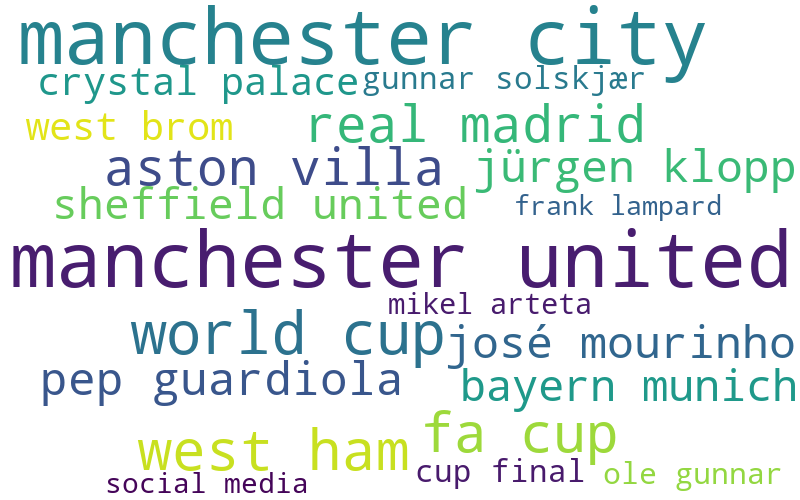

In [ ]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(bigram_counter, f"{outcome_folder}/PJ_bigram_wordcloud.png", 20)

In [ ]:
global_stopwords = nltk.corpus.stopwords.words("english") 
counter1 = get_counter(df, global_stopwords+local_stopwords, "NN")
word_list = counter1.most_common(1000)

In [ ]:
word_list
# word_list.index('park')

[('manager', 3110),
 ('premier', 2916),
 ('games', 2849),
 ('manchester', 2649),
 ('goal', 2555),
 ('player', 2532),
 ('years', 2513),
 ('home', 2500),
 ('city', 2377),
 ('united', 2355),
 ('champions', 2204),
 ('cup', 2186),
 ('goals', 2178),
 ('end', 2084),
 ('year', 2010),
 ('ball', 1938),
 ('minutes', 1933),
 ('week', 1922),
 ('win', 1907),
 ('world', 1901),
 ('england', 1862),
 ('day', 1832),
 ('place', 1791),
 ('match', 1743),
 ('fans', 1722),
 ('clubs', 1709),
 ('people', 1695),
 ('liverpool', 1692),
 ('half', 1683),
 ('points', 1677),
 ('point', 1666),
 ('something', 1622),
 ('chelsea', 1616),
 ('part', 1590),
 ('matches', 1582),
 ('teams', 1574),
 ('defeat', 1516),
 ('things', 1502),
 ('chance', 1488),
 ('days', 1454),
 ('lot', 1453),
 ('squad', 1447),
 ('arsenal', 1444),
 ('times', 1436),
 ('start', 1429),
 ('victory', 1422),
 ('sunday', 1407),
 ('moment', 1364),
 ('summer', 1329),
 ('thing', 1301),
 ('pitch', 1293),
 ('west', 1289),
 ('months', 1278),
 ('striker', 1268),
 ('

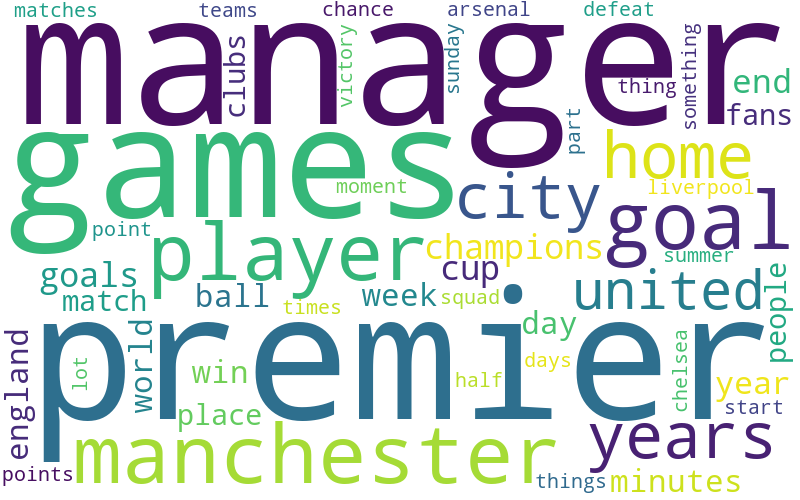

In [ ]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(counter1, f"{outcome_folder}/PJ_wordcloud.png", 50)

In [ ]:
#<div class="fc-item__container">
#안에  <a href

#기사 내용 article-body-commercial-selector css-79elbk article-body-viewer-selector 안에 있음 다!!
#sign-in-gate-main_dismiss 누르면 보임!


In [ ]:
# !pip install Selenium

# !apt-get update # to update ubuntu to correctly run apt install

# !apt install chromium-chromedriver



In [ ]:
# from selenium import webdriver
# from urllib.request import urlopen
# from bs4 import BeautifulSoup
# from urllib.parse import quote_plus
# from selenium.webdriver.common.keys import Keys
# import time

# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('chromedriver', options=chrome_options)


# driver.get("https://www.theguardian.com/football?page=1")

# dps = driver.page_source

# myBS = BeautifulSoup(dps, 'html.parser')

# temp = myBS.find_all('div', {'class':'fc-item__content'})
# for t in temp:
#   print(t.find("a")["href"])


# driver.get("https://www.theguardian.com/football?page=2")

# dps = driver.page_source

# myBS = BeautifulSoup(dps, 'html.parser')

# temp = myBS.find_all('div', {'class':'fc-item__content'})
# for t in temp:
#   print(t.find("a")["href"])





# # 페이지 다운시켜서 더 많은 이미지가 나오게 한다
# for i in range(10):
#     body.send_keys(Keys.PAGE_DOWN)
#     time.sleep(1)

# imgs = driver.find_elements_by_css_selector('img._img')

# for idx, img in enumerate(imgs):
#     print(idx,img.get_attribute('src'))
#     imgUrl = img.get_attribute('src')
#     imgName = '/content/gdrive/Shareddrives/SW_Coaching_for_Python/SYC/outcome/'+kword + str(idx)+'.jpg'
#     urllib.request.urlretrieve(imgUrl, imgName)